In [2]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

torch.__version__

'2.1.2+cpu'

### 0.Importing PyTorch

In [3]:
###### setting up device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

### 1.Get data

In [4]:
import requests
import zipfile
from pathlib import Path


data_path = Path("data/")
image_path = data_path / "archive"

if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    image_path.mkdir(parents=True, exist_ok=True)

    with zipfile.ZipFile(data_path/ "archive.zip", "r") as zip_ref:
        print("unizipping...")
        zip_ref.extractall(image_path)

unizipping...


In [4]:
train_data = datasets.FashionMNIST(
    root= 'data', # where to download data to?
    train= True,  # training data
    download= True, # download data if it doesnt exist on disk
    transform= ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # transform labels
)

test_data =  datasets.FashionMNIST(
    root= 'data',
    train= False,
    download= True,
    transform= ToTensor()
)

In [5]:
image, label= train_data[0]
image.shape

torch.Size([1, 28, 28])

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
#Prepare DataLoader

from torch.utils.data import DataLoader



### 2. Become one with the data (data preparation)

In [5]:
import os

def walk_through_dir(dir_path):

    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


In [6]:
walk_through_dir(image_path)

There are 3 directories and 1 images in 'data\archive'.
There are 2 directories and 0 images in 'data\archive\test'.
There are 0 directories and 192 images in 'data\archive\test\images'.
There are 0 directories and 192 images in 'data\archive\test\labels'.
There are 2 directories and 0 images in 'data\archive\train'.
There are 0 directories and 2167 images in 'data\archive\train\images'.
There are 0 directories and 2167 images in 'data\archive\train\labels'.
There are 2 directories and 0 images in 'data\archive\valid'.
There are 0 directories and 417 images in 'data\archive\valid\images'.
There are 0 directories and 417 images in 'data\archive\valid\labels'.


In [7]:
train_dir = image_path/"train"
test_dir = image_path/"test"

train_dir, test_dir

(WindowsPath('data/archive/train'), WindowsPath('data/archive/test'))

##### Visualizing our data

In [2]:
from PIL import Image
image= Image.open(r'C:\Users\navee\Desktop\ML_AI\pytorch\pytorch_custom_dataset\image.png')

Random image path: data\archive\valid\images\56b_jpg.rf.f63f8321f360cb8cf3dc68ebc0332ae6.jpg
image class:images
image_height: 640 & image_width: 640


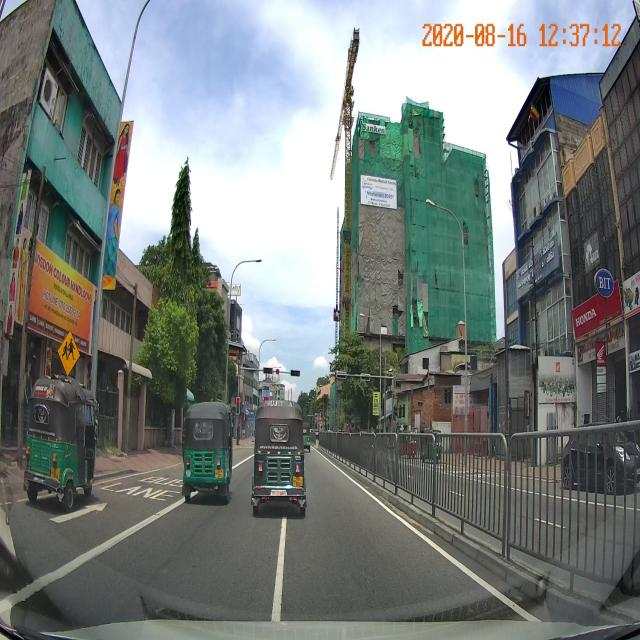

In [8]:
import random
from PIL import Image

random.seed(42)

#1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

#2. Get random image path
random_image_path = random.choice(image_path_list)

#3. Get image class from path name
image_class = random_image_path.parent.stem

#4. Open image
img =  Image.open(random_image_path)

#5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"image class:{image_class}")
print(f"image_height: {img.height} & image_width: {img.width}")

img

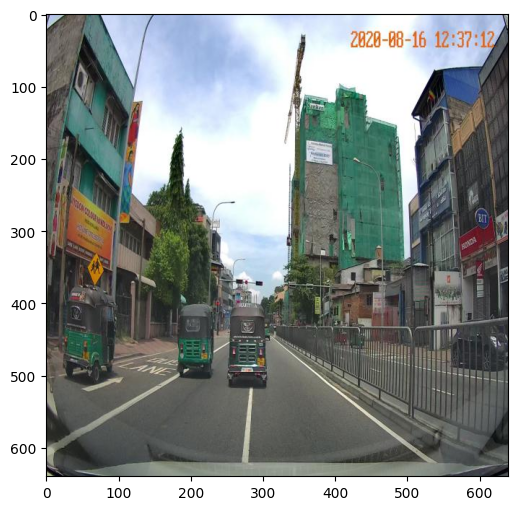

In [11]:
#showing with matplotlib
import numpy as np
import matplotlib.pyplot as plt

#Turn the image into an array
img_as_array = np.asarray(img)

#Plot the image with matplotlib
plt.figure(figsize=(6,6))
plt.imshow(img_as_array)

### Transforming data

In [12]:
import torch 
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [13]:
# Write transform for image

data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)), #Resize the images to 64*64
    transforms.RandomHorizontalFlip(p=0.5), #P = 50% chances probability of flip 
    transforms.ToTensor() #turn the image into a torch.Tensor #this also converts all pixel values from 0 to 255
])